Disease Prediction Using Machine Learning:
Here we are building machine-learning model that can efficiently predict the disease of a human, based on the symptoms that he/she possesses. Let us look into how we can approach this machine-learning problem:



1. Data Gathering:
   - Obtain a dataset from Kaggle containing training and testing CSV files.
   - The dataset has 133 columns: 132 representing symptoms and the last one indicating prognosis.

2. Data Cleaning:
   - Clean the dataset to ensure high-quality data for model training.
   - All columns are numerical; the target column (prognosis) is encoded using a label encoder.

3. Model Building:
   - Utilize the cleaned data to train three classifiers:
     - Support Vector Classifier
     - Naive Bayes Classifier
     - Random Forest Classifier
   - Evaluate model quality using a confusion matrix.

4. Inference:
   - Combine predictions from all three models to enhance overall accuracy in disease prediction.


In [93]:
#First let us import all the libraries required
import pandas as pd 
import numpy as np 
from scipy.stats import mode 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [94]:
#read the Training Data
Data_Frame="D:\GitHUB Projects [up]\disease prediction\Training.csv"
data=pd.read_csv(Data_Frame)
data.head(5)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [95]:
#remove the last column has no values it is not useful for us so let's remove it
data=pd.read_csv(Data_Frame).dropna(axis=1)
data.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [96]:
#let us check weather the data is balanced or not
disease_counts=data["prognosis"].value_counts()
print(disease_count)

NameError: name 'disease_count' is not defined

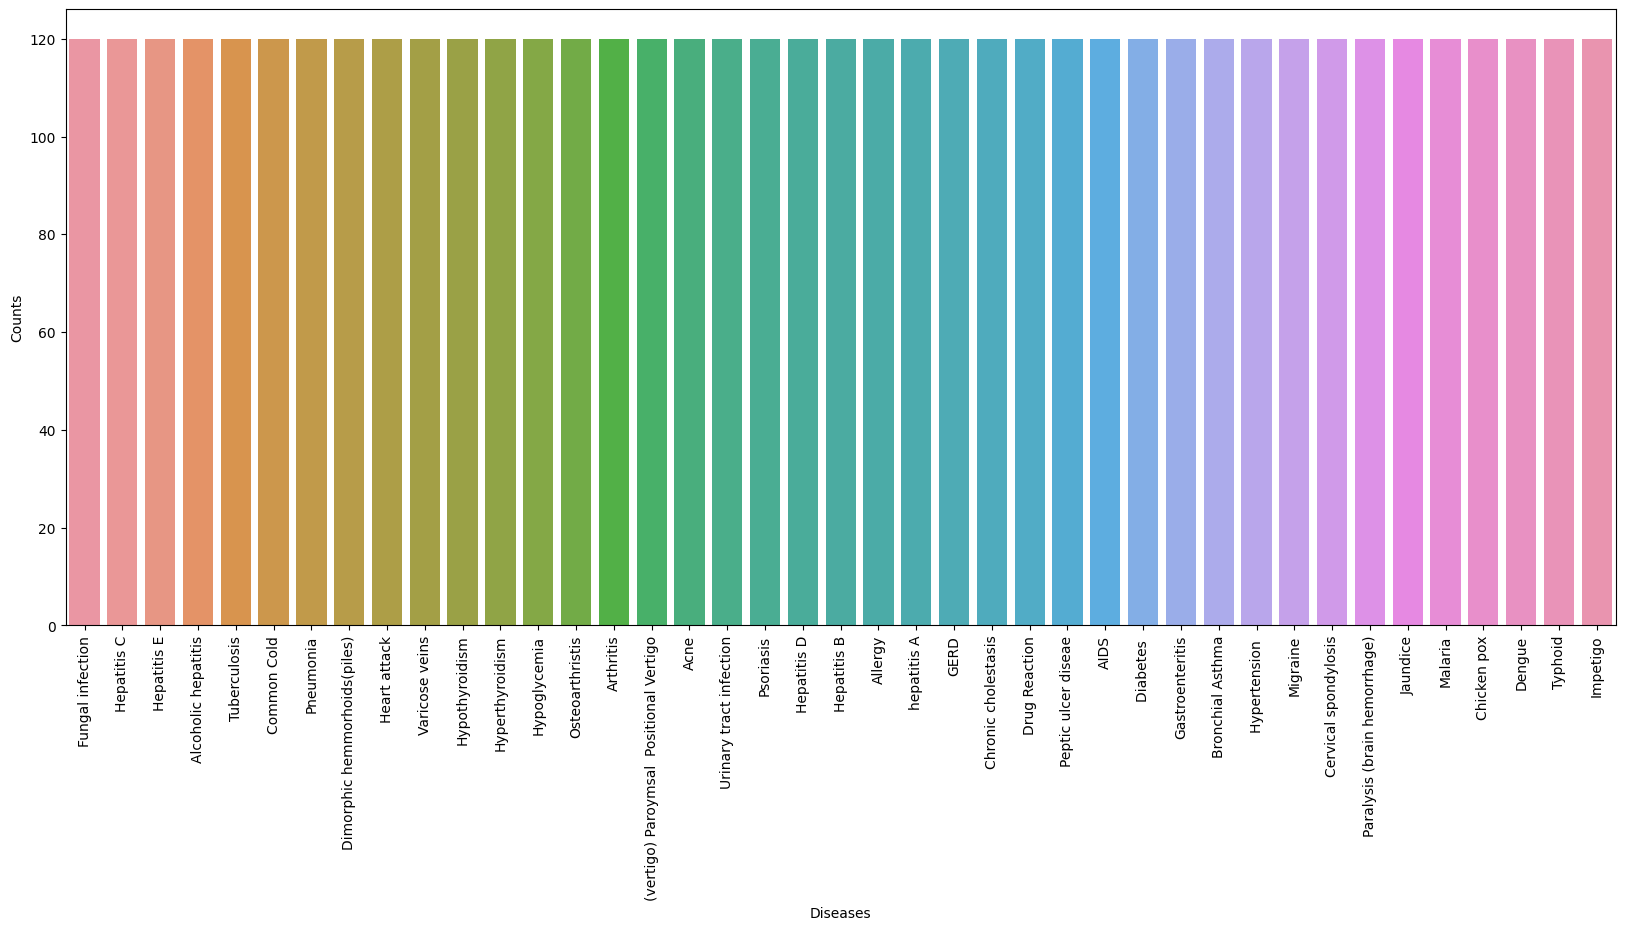

In [ ]:
temp_df=pd.DataFrame({
    "Diseases": disease_counts.index,
    "Counts": disease_counts.values
})
#lets plot the graph to check the balance in the counts
plt.figure(figsize=(20,8))
sns.barplot(x='Diseases',y="Counts",data=temp_df)
plt.xticks(rotation=90)
plt.show()

From the above plot we understand the dataset is properly balanced as there are exactly 120 samples of each disease.

#as we the prognosis column contain the object datatype which we cannot use in ML models so we need to convert it into numerical form by assigning unique index to each
label and we will be doing with help of 

In [ ]:
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC 
from  sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, confusion_matrix

In [ ]:
encoder=LabelEncoder()
data['prognosis']=encoder.fit_transform(data['prognosis'])
data['prognosis'].head(20)

0     15
1     15
2     15
3     15
4     15
5     15
6     15
7     15
8     15
9     15
10     4
11     4
12     4
13     4
14     4
15     4
16     4
17     4
18     4
19     4
Name: prognosis, dtype: int32

Splitting the data for training and testing the model
Now that we have cleaned our data by removing the Null values and converting the labels to numerical format, It’s time to split the data to train and test the model. We will be splitting the data into 80:20 format i.e. 80% of the dataset will be used for training the model and 20% of the data will be used to evaluate the performance of the models.

In [ ]:
X=data.iloc[:,:-1]#X represents the input features (all columns except the last one) from your dataset.

y=data.iloc[:,-1] #y represents the target variable (the last column, which contains the prognosis or disease label).
# X_train: The input features for training athe model.
# X_test: The input features for evaluating the model.
# y_train: The corresponding target labels for training.
# y_test: The corresponding target labels for testing.
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=24)

print(f"Train: {X_train.shape},{y_train.shape}")
print(f"Test:{y_train.shape},{y_test.shape}")

Train: (3936, 132),(3936,)
Test:(3936,),(984,)


After splitting the data, we will be now working on the modeling part. We will be using K-Fold cross-validation to evaluate the machine-learning models.

 We will be using Support Vector Classifier, Gaussian Naive Bayes Classifier, and Random Forest Classifier for cross-validation

K-Fold Cross-Validation: K-Fold cross-validation is one of the cross-validation techniques in which the whole dataset is split into k number of subsets, also known as folds, then training of the model is performed on the k-1 subsets and the remaining one subset is used to evaluate the model performance.

In [ ]:
def cv_scoring(estimator,X,y):
    return accuracy_score(y, estimator.predict(X))

models={
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "Random Forest":RandomForestClassifier(random_state=18)
    
}

for model_name in models:
    model_using=models[model_name]
    scores=cross_val_score(model_using,X,y,cv=10,#divide data into 10 folds
                                n_jobs=-1,
                                scoring=cv_scoring)

    print("=="*30)
    print(model_name)
    print(f"scores:{scores}")
    print(f"Mean Score: {np.mean(scores)} ")


SVC
scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0 
Gaussian NB
scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0 
Random Forest
scores:[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0 


From the above output, we can notice that all our machine learning algorithms are performing very well and the mean scores after k fold cross-validation are also very high. To build a robust model we can combine i.e. take the mode of the predictions of all three models so that even one of the models makes wrong predictions and the other two make correct predictions then the final output would be the correct one.

Accuracy on train data by SVM Classifier:100.0
Accuracy on test data by SVM Classifier:100.0


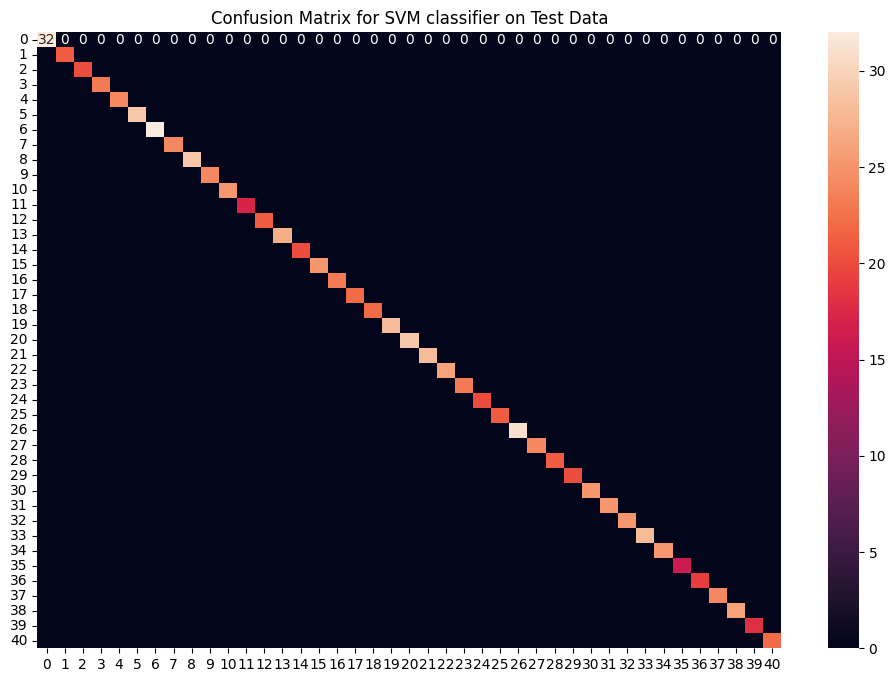

In [ ]:
svm_model=SVC()
svm_model.fit(X_train,y_train)
preds=svm_model.predict(X_test)

print(f"Accuracy on train data by SVM Classifier:{accuracy_score(y_train,svm_model.predict(X_train))*100}")
print(f"Accuracy on test data by SVM Classifier:{accuracy_score(y_test,preds)*100}")

cf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix for SVM classifier on Test Data')
plt.show()

Gaussian Naive Bayes Classifier: It is a probabilistic machine learning algorithm that internally uses Bayes Theorem to classify the data points.



Accuracy on trained data by naive bayes classifer:100.0
Accuracy on test data by naive bayes classifer:100.0


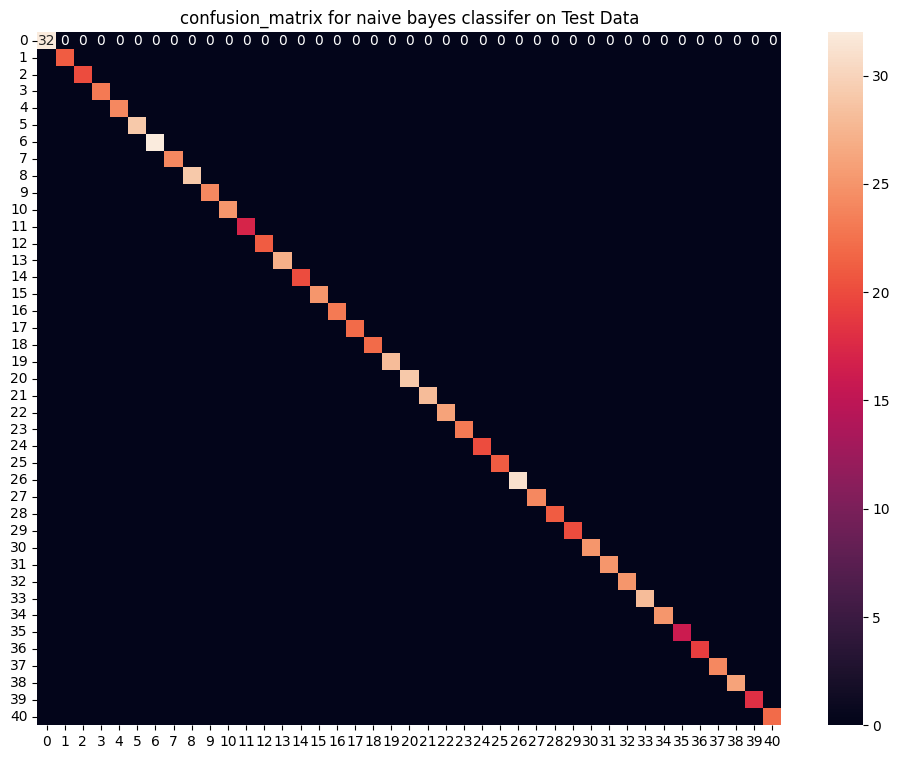

In [ ]:
# Training and testing Naive Bayes Classifier
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
preds=nb_model.predict(X_test)
print(f"Accuracy on trained data by naive bayes classifer:{accuracy_score(y_train, nb_model.predict(X_train))*100}")
print(f"Accuracy on test data by naive bayes classifer:{accuracy_score(y_test,preds)*100}")

cf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,9))
sns.heatmap(cf_matrix, annot=True)
plt.title("confusion_matrix for naive bayes classifer on Test Data")
plt.show()

Random Forest Classifier: Random Forest is an ensemble learning-based supervised machine learning classification algorithm that internally uses multiple decision trees to make the classification. In a random forest classifier, all the internal decision trees are weak learners, and the outputs of these weak decision trees are combined i.e. mode of all the predictions is as the final prediction.

Accuracy on the train data by Random Forest Classifier:100.0
Accuracy on test data by Random Forest Classifier:100.0


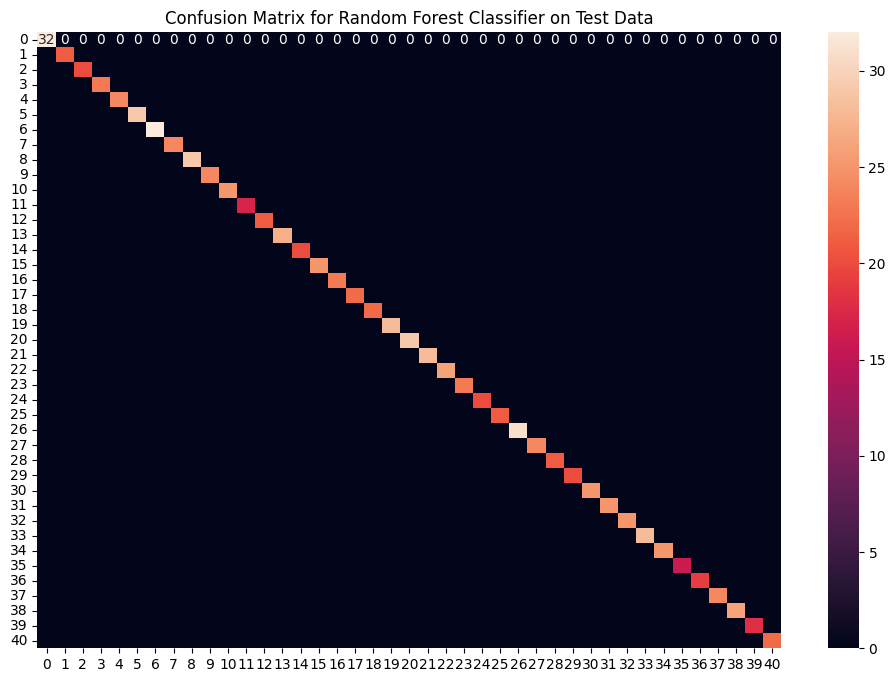

In [ ]:
#Training and testing random forest classifier
rf_model=RandomForestClassifier(random_state=18)
rf_model.fit(X_train,y_train)
preds=rf_model.predict(X_test)

print(f"Accuracy on the train data by Random Forest Classifier:{accuracy_score(y_train,rf_model.predict(X_train))*100}")
print(f"Accuracy on test data by Random Forest Classifier:{accuracy_score(y_test, preds)*100}")

cf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title('Confusion Matrix for Random Forest Classifier on Test Data')
plt.show()

From the above confusion matrices, we can see that the models are performing very well on the unseen data. Now we will be training the models on the whole train data present in the dataset that we downloaded and then test our combined model on test data present in the dataset.



Fitting the model on whole data and validating on the Test dataset: 

In [ ]:
#Training the models on whole data set
final_svm_model=SVC()
final_nb_model=GaussianNB()
final_rf_model=RandomForestClassifier(random_state=18)
final_svm_model.fit(X,y)
final_nb_model.fit(X,y)
final_rf_model.fit(X,y)

#Reading the test data
test_data=pd.read_csv("D:\GitHUB Projects [up]\disease prediction\Testing.csv").dropna(axis=1)

test_X=test_data.iloc[:,:-1]
test_Y=encoder.transform(test_data.iloc[:,-1])

#Making prediction by taking mode of predictions
# Mode by all the classifiers

svm_preds=final_svm_model.predict(test_X)
nb_preds=final_nb_model.predict(test_X)
rf_preds=final_rf_model.predict(test_X)

final_preds=[mode([i,j,k])[0][0] for i,j,k in zip(svm_preds, nb_preds, rf_model)]

print(f"Accuracy on test dataset by the combined mode:{accuracy_score(test_Y, final_preds)*100}")

cf_matrix= confusion_matrix(test_Y,final_preds)
plt.figure(figsize=(12,9))

sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for comnined model on test data")
plt.show()

TypeError: Argument `a` is not recognized as numeric. Support for input that cannot be coerced to a numeric array was deprecated in SciPy 1.9.0 and removed in SciPy 1.11.0. Please consider `np.unique`.

In [ ]:
# Training the models on whole data 
final_svm_model = SVC() 
final_nb_model = GaussianNB() 
final_rf_model = RandomForestClassifier(random_state=18) 
final_svm_model.fit(X, y) 
final_nb_model.fit(X, y) 
final_rf_model.fit(X, y) 

# Reading the test data 
test_data = pd.read_csv("D:\GitHUB Projects [up]\disease prediction\Testing.csv").dropna(axis=1) 

test_X = test_data.iloc[:, :-1] 
test_Y = encoder.transform(test_data.iloc[:, -1]) 

# Making prediction by take mode of predictions 
# made by all the classifiers 
svm_preds = final_svm_model.predict(test_X) 
nb_preds = final_nb_model.predict(test_X) 
rf_preds = final_rf_model.predict(test_X) 

final_preds = [mode([i,j,k])[0][0] for i,j, k in zip(svm_preds, nb_preds, rf_preds)] 

print(f"Accuracy on Test dataset by the combined model {accuracy_score(test_Y, final_preds)*100}") 

cf_matrix = confusion_matrix(test_Y, final_preds) 
plt.figure(figsize=(12,8)) 

sns.heatmap(cf_matrix, annot = True) 
plt.title("Confusion Matrix for Combined Model on Test Dataset") 
plt.show()


IndexError: invalid index to scalar variable.

In [ ]:
# Training the models on whole data
final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)
final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

# Reading the test data
test_data = pd.read_csv("D:\GitHUB Projects [up]\disease prediction\Testing.csv").dropna(axis=1)

test_X = test_data.iloc[:, :-1]
test_Y = encoder.transform(test_data.iloc[:, -1])

# Making predictions by taking the mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [mode([i, j, k])[0][0] for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on the test dataset by the combined model: {accuracy_score(test_Y, final_preds) * 100:.2f}%")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12, 8))

sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


IndexError: invalid index to scalar variable.

Accuracy on the test dataset by the combined model: 100.00%


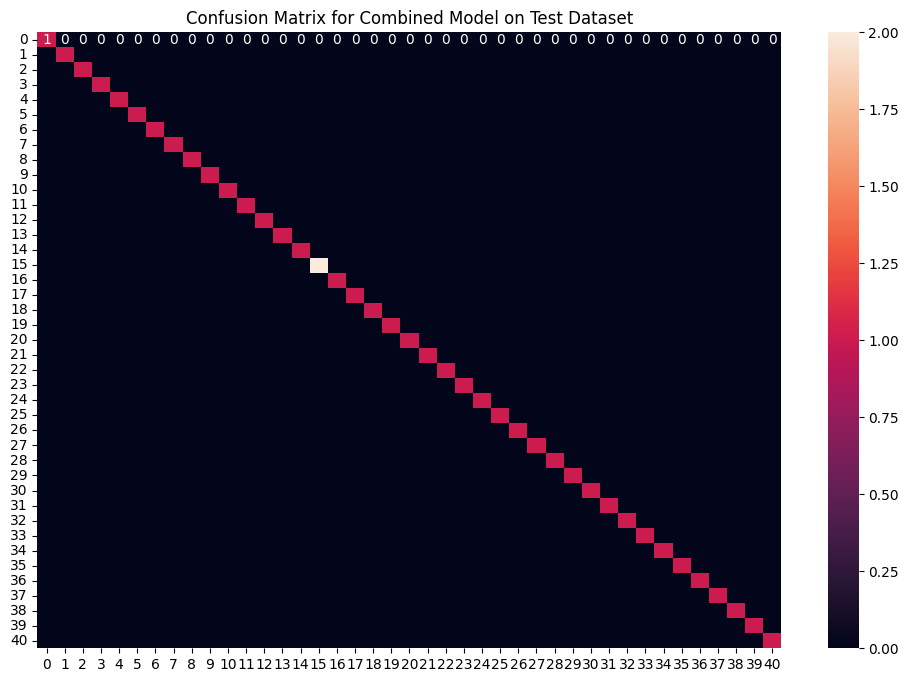

In [ ]:
from collections import Counter


# Making predictions by taking the mode of predictions
# made by all the classifiers
svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

# Find the most common prediction for each sample
final_preds = [Counter([i, j, k]).most_common(1)[0][0] for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

print(f"Accuracy on the test dataset by the combined model: {accuracy_score(test_Y, final_preds) * 100:.2f}%")

cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12, 8))

sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()


In [99]:
import numpy as np

# ... (previous code remains unchanged)

def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    input_data = [0] * len(data_dict["symptom_index"])
    
    for symptom in symptoms:
        index = data_dict["symptom_index"].get(symptom)
        if index is not None:
            input_data[index] = 1

    input_data = np.array(input_data).reshape(1, -1)
    
    rf_prediction = data_dict["predictions_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["predictions_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["predictions_classes"][final_svm_model.predict(input_data)[0]]
    
    # Find the most common prediction
    all_predictions = [rf_prediction, nb_prediction, svm_prediction]
    final_prediction = max(set(all_predictions), key=all_predictions.count)
    
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction": final_prediction
    }
    
    return predictions

print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))


{'rf_model_prediction': 'Fungal infection', 'naive_bayes_prediction': 'Fungal infection', 'svm_model_prediction': 'Fungal infection', 'final_prediction': 'Fungal infection'}


C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\ravit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
